In [3]:
# -*- coding: utf-8 -*-
# ---------------------------------------------------------------------------
# comm_aoi_2xls.py
# Created on: 2017-10-20 13:22:32.00000
#   (generated by ArcGIS/ModelBuilder)
# Description: 
# ---------------------------------------------------------------------------
#%% Import arcpy module
import sys
import os
import arcpy
from arcpy import env
import pandas as pd
import numpy as np
from pandas import DataFrame
import xlsxwriter
import matplotlib as mpl
import matplotlib.pyplot as plt
#import plotly.plotly as py
# =============================================================================
import geopandas as gpd
import pysal
# =============================================================================
sys.path.append(r'C:\01_OCHA_TR\03_IM_Tools\ArcGIS\Community_AoI_2XLS')
import arcpy_dataframe as arcpy_df
#%%---------------------------
arcpy.env.overwriteOutput = True

ImportError: No module named xlsxwriter

In [2]:
print (sys.version)

2.7.13 |Anaconda, Inc.| (default, Sep 30 2017, 11:12:43) [MSC v.1500 32 bit (Intel)]


In [65]:
print (pysal.version)

1.14.2


In [8]:
#dirname = os.path.realpath('.')
#print (dirname)
dirname = os.path.dirname(os.path.realpath('__file__'))
print (dirname)

C:\01_OCHA_TR\03_IM_Tools\ArcGIS\Community_AoI2XLS


In [9]:
#%%-----This is used in Model builder-----------------
#get parameter input of data layers and savefilename 
#Get the value of the input parameter
#%%get the point layer
l_pnt = arcpy.GetParameterAsText(0) #get it as layer
#get AoI polygon layer
l_ply = arcpy.GetParameterAsText(1) #get it as layer
#get xlsx save file name
#f_save = arcpy.GetParameterAsText(2)
#pdfmergedfile = arcpy.GetParameterAsText(2)
arcpy.AddMessage("Point layer: " + l_pnt)
arcpy.AddMessage("Polygon layer: " + l_ply)
#%%
# =============================================================================
# filename = raw_input('Enter a filename: ')
# import tkFileDialog
# file_path = tkFileDialog.askopenfilename()
# 
# =============================================================================
print (l_pnt)

-f


In [10]:
#%%input and save file
exporttype="xlsx"
l_pnt=r'C:/Dropbox/Analysis/syr_pplp_adm4_unocha_forAOI.shp'
l_gdb = r'C:/Dropbox/gis.gdb'
l_gdb_aoi = 'Areas_of_influence_20170925'
#create save file name
f_save_xlsx = os.path.join(dirname, l_gdb_aoi + "." + exporttype )
print(f_save_xlsx)


# #for arcpy package
l_ply=r'C:/Dropbox/Areas_of_influence_20170925'
f_save=r'C:/Dropbox/999_Punya_Working/Analysis/SEP_AoI_20170925.xls'
# #temporary saving file
t_l_pnt = r'C:/Dropbox/Analysis/Analysis.mdb/SEP_Areas_of_influence_20170925'



C:\01_OCHA_TR\03_IM_Tools\ArcGIS\Community_AoI2XLS\Areas_of_influence_20170925.xlsx


In [11]:
#---Geopandas---------------
#---Readfiles--shapefile
l_pnt_gpd = gpd.read_file(l_pnt)
l_pnt_gpd.head(2)

,OBJECTID,admin0Name,admin0Na_1,admin0Pcod,admin1Name,admin1Na_1,admin1Pcod,admin2Name,admin2Na_1,admin2Pcod,...,admin4Al_2,admin4Al_3,IsAdmin1Ca,IsAdmin3Ca,LastUpdate,validOn,validTo,Latitude,Longitude,geometry
0,1,Syrian Arab Republic,الجمهورية العربية السورية,SY,Aleppo,حلب,SY02,Menbij,منبج,SY0205,...,None,None,No,No,2016-09-05,2016-09-05,None,36.155368,37.795819,POINT (37.79581927000004 36.15536782200007)
1,2,Syrian Arab Republic,الجمهورية العربية السورية,SY,Al-Hasakeh,الحسكة,SY08,Ras Al Ain,رأس العين,SY0804,...,None,None,No,No,2016-09-05,2016-09-05,None,36.942846,40.506635,POINT (40.50663469300008 36.94284567800003)


In [12]:
#--Geopandas---Read GDB
l_ply_gpd=gpd.read_file(l_gdb, driver='FileGDB', layer=l_gdb_aoi)
l_ply_gpd.head(2)

,Actor_Type,Country,Shape_Length,Shape_Area,geometry
0,Government (SAA),Syria,0.000086,7.519774e-11,(POLYGON Z ((37.10033181500006 34.205494774000...
1,Government (SAA),Syria,0.465380,9.863379e-03,(POLYGON Z ((40.99964101500007 36.598963954000...


In [13]:
#---Geopandas---spatial join-----
l_pnt_aoi = gpd.sjoin(l_pnt_gpd, l_ply_gpd, how="inner", op="within")
l_pnt_aoi.head(2)

,OBJECTID,admin0Name,admin0Na_1,admin0Pcod,admin1Name,admin1Na_1,admin1Pcod,admin2Name,admin2Na_1,admin2Pcod,...,validOn,validTo,Latitude,Longitude,geometry,index_right,Actor_Type,Country,Shape_Length,Shape_Area
0,1,Syrian Arab Republic,الجمهورية العربية السورية,SY,Aleppo,حلب,SY02,Menbij,منبج,SY0205,...,2016-09-05,None,36.155368,37.795819,POINT (37.79581927000004 36.15536782200007),14,Government (SAA),Syria,7.38162,1.141856
42,43,Syrian Arab Republic,الجمهورية العربية السورية,SY,Aleppo,حلب,SY02,As-Safira,السفيرة,SY0207,...,2016-09-05,None,36.182567,37.419009,POINT (37.41900919800003 36.18256696100008),14,Government (SAA),Syria,7.38162,1.141856


In [15]:
#----Export to Excel-
df = pd.DataFrame(l_pnt_aoi)
df = df.astype(unicode)
#df.info()
drop_columns = ["admin4AltN", "admin4Al_1","admin4Al_2","admin4Al_3", "Shape_Length","Shape_Area","index_right"]
#df.drop(drop_columns, inplace=True, axis=1)
#df.drop(df.columns[0], inplace=True, axis=1)
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(f_save_xlsx, engine='xlsxwriter')
df.to_excel(writer, sheet_name="AoI", index=False)
writer.save()
#list(df.columns.values)

In [26]:
l_pnt_aoi.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 5595 entries, 0 to 5247
Data columns (total 35 columns):
OBJECTID        5595 non-null int64
admin0Name      5595 non-null object
admin0Na_1      5595 non-null object
admin0Pcod      5595 non-null object
admin1Name      5595 non-null object
admin1Na_1      5595 non-null object
admin1Pcod      5595 non-null object
admin2Name      5595 non-null object
admin2Na_1      5595 non-null object
admin2Pcod      5595 non-null object
admin3Name      5595 non-null object
admin3Na_1      5595 non-null object
admin3Pcod      5595 non-null object
admin4Name      5595 non-null object
admin4Na_1      5595 non-null object
admin4Pcod      5595 non-null object
admin4RefN      5595 non-null object
admin4Re_1      5595 non-null object
admin4AltN      0 non-null object
admin4Al_1      0 non-null object
admin4Al_2      0 non-null object
admin4Al_3      0 non-null object
IsAdmin1Ca      5595 non-null object
IsAdmin3Ca      5595 non-null object
LastUpdate

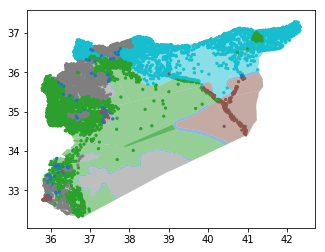

In [68]:
%matplotlib inline
#some plots
#check geometry column
#plt.ion()
#print(l_pnt_aoi.geometry.name)
fig, ax = plt.subplots()
# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')
base = l_ply_gpd.plot(ax=ax, alpha=0.5, column="Actor_Type")
aoi_plot = l_pnt_aoi.plot(ax=base, column="Actor_Type", marker='o',  markersize=5)
plt.show();

In [53]:
%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
</style>

In [ ]:
df = pd.DataFrame(l_pnt_aoi)
df.head(2)
df.to_excel('b.xlsx')

In [ ]:
gdf = gpd.GeoDataFrame(l_pnt_aoi)
#gdf.to_excel("b.xlsx")
list(gdf.columns.values)

In [ ]:
#%%perform spatial join
arcpy.SpatialJoin_analysis(target_features = l_pnt,
  join_features = l_ply,
  out_feature_class = t_l_pnt,
  join_operation = "JOIN_ONE_TO_ONE",
  join_type = "KEEP_ALL",
  match_option="WITHIN",
  distance_field_name='')                           
#%%Process: Table To Excel
arcpy.TableToExcel_conversion(t_l_pnt, f_save, "NAME", "CODE")

#%%some tests
fields = arcpy.ListFields(t_l_pnt)
# variable to store list
fields = []
# for every field in the feature class
for field in arcpy.ListFields(t_l_pnt):
        # if the field is not geometry nor oid
        if field.type != 'Geometry' and field.type != 'OID':
            # append the field name to the list
            fields.append(field.name)
#field_list= fields_list(t_l_pnt)
field_list=fields
arcpy.da.FeatureClassToNumPyArray(
        in_table=t_l_pnt,
        field_names=field_list,
        skip_nulls=False,
        null_value=-99999
        )
#%%export feature to dataframe 
#Create variable for feature class 
fc = r'C:\Dropbox\gis\01_Analysis_Projects\999_Punya_Working\Analysis\Analysis.mdb\SEP_Areas_of_influence_20170925_1'  
#Create field list with a subset of the fields (cannot include datetime fields for  
#da.FeatureClassToNumPy tool) 
fc_fields= arcpy_df.fields_list(t_l_pnt) 
#fc_fields=fields
#Convert Feature Class to NumPy Array.  Due to the fact that NumPy arrays do not 
#accept null values for integer fields, I had to convert null values to -99999 
fc_np = arcpy.da.FeatureClassToNumPyArray(fc, fc_fields, skip_nulls = False,null_value = -99999)  
#Convert NumPy array to pandas DataFrame.   
fc_pd = DataFrame(fc_np)


In [ ]:
fc_pd.head(2)

In [ ]:
fc_pd.to_excel("a.xlsx")
#%%Geopandas test
# =============================================================================
# fc_l_pnt=gpd.read_file(l_pnt)
# fc_l_pnt.head()
# fc_l_pnt.plot(marker='*', color='cyan', markersize=3)
# =============================================================================

# =============================================================================
# #%%Operation
# fc_l_pnt.buffer(0.5).plot()
# 
# =============================================================================

#%%--

In [ ]:
l_pnt